# Measuring activation fronts near death
Tim Tyree<br>
5.7.2021

In [2]:
from lib.my_initialization import *
from lib.controller.controller_LR import get_one_step_explicit_synchronous_splitting
from lib.utils import load_buffer
from lib.routines.return_min_distance import *

#automate the boring stuff
# from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
    
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


In [5]:
darkmode=True
if darkmode:
	# For darkmode plots
	from jupyterthemes import jtplot
	jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)


In [11]:
from lib.viewer.DomainPlot import ShowDomain
#TODO(brainwarmer): check Slides for whether tips move along dVdt levelsets or along V levelsets
#TODO: load/plot system
#TODO: compute each of the the final scalar values needed for the following...
#TODO: test angular difference between cartesion acceleration and acceleration in the direction of the activation front versus time
#TODO: linearly track lesser_arclen of these two death events on a dt=0.001 ms timescale fixed at the basic subpixel resolution
#TODO: test proposition that lesser_arclen always drops shortly annihilating, perhaps on the 0.01~0.02 (ms?) timescale.  
# ^This would support the mechanism of annihilation involving the connection of activation fronts/strings with some tension to contract
# ^This would support using a model of spiral tip dynamics along an activation front to inform our reaction rate calculations
# HINT: consider rate = 1/expected_time_to_death, where the arclength behaves in a predictable way, i.e.
# dsigma_max_dt=foo(sigma_max;relative phase?)

In [24]:
dt=0.001
txt_fn=f'{nb_dir}/Data/test_data/ic008.33_t_218.8.npz'
t=218.8;ds=5.;V_threshold=-50.
txt=load_buffer(txt_fn)
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
width,height=txt.shape[:2]
print(txt.shape)
one_step,comp_distance,comp_dict_tips=init_methods(width,height,ds,dt,V_threshold=V_threshold,jump_threshold=40)
comp_dict_topo_full_color=comp_dict_tips
#reidentify the tips to be tracked
img=inVc[...,0];dimgdt=dVcdt[...,0]
dict_tips=comp_dict_tips(img, dimgdt, t, txt)
pdict=ParticlePBCDict(dict_tips=dict_tips, width=width, height=width)#, **kwargs)
t_prev=t;txt_prev=txt.copy()

(200, 200, 18)


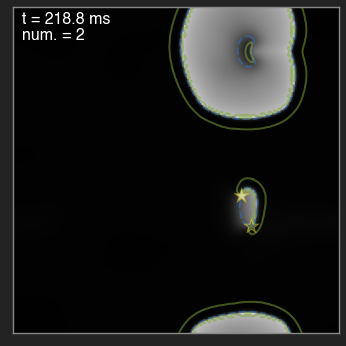

In [25]:
#visualize token death system
x_values=np.array(dict_tips['x'])[:-2]
y_values=np.array(dict_tips['y'])[:-2]
c_values=np.array(dict_tips['pid'])[:-2]
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,
                 fontsize=16,vmin_img=-85.,vmax_img=35.,area=25,
                 frameno=None,#frameno,
                 save_fn=None,#save_fn,
                 save_folder=None,#save_folder,
                 save=False,#True,
                 annotating=True,
                 axis=[0,img.shape[0],0,img.shape[1]])

In [ ]:
#better method: take more data!
#DONE/DONT(later): look for more reliable way to identify activation fronts... use consistency of position over time??
# HINT: consider looking at mean gating variables from the comp_dict_topo_full_color
#TODO: linearly record data for ^these spiral tips at a high sampling rate (and fine spatial resolution)

In [ ]:
from inspect import getsource
print ( getsource(pdict.record_tips_return_txt))
# pdict.record_tips_return_txt?